In [18]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Xopt class, GPT CBETA DC GUN example

This is the class method for running Xopt.

In [17]:
from xopt import Xopt

In [135]:
import yaml

# Make a proper input file. 

YAML="""
xopt: {output_path: null, verbose: true,
  algorithm: cnsga}
  
algorithm:
  name: cnsga
  options: {max_generations: 16, population_size: 24, crossover_probability: 0.9, mutation_probability: 1.0,
  selection: auto, verbose: true, population: null}

simulation:
  name: gpt_with_distgen
  evaluate: gpt.evaluate.evaluate_gpt_with_distgen
  

# Note that you can call another file in the top level group:
vocs: ../templates/cbeta_dcgun/cbeta_dcgun_vocs.json

"""
config = yaml.safe_load(YAML)

In [136]:
# Create object
X = Xopt(config=config)

# Show config
X

Loading config as dict.



            Xopt
________________________________           

Configured: True

Config as YAML:
xopt: {output_path: null, verbose: true, algorithm: cnsga}
algorithm:
  name: cnsga
  function: xopt.cnsga.cnsga
  options: {max_generations: 16, population_size: 24, crossover_probability: 0.9,
    mutation_probability: 1.0, selection: auto, verbose: true, population: null, seed: null}
simulation:
  name: gpt_with_distgen
  evaluate: gpt.evaluate.evaluate_gpt_with_distgen
  options: {archive_path: null, merit_f: null, gpt_input_file: /Users/colwyngulliford/Documents/GitHub/xopt/examples/templates/cbeta_dcgun/cbeta_dcgun_gpt.in,
    distgen_input_file: /Users/colwyngulliford/Documents/GitHub/xopt/examples/templates/cbeta_dcgun/cbeta_dcgun_distgen.yaml}
vocs:
  name: cu dcgun
  description: Test case
  simulation: gpt_with_distgen
  templates: {gpt_input_file: /Users/colwyngulliford/Documents/GitHub/xopt/examples/templates/cbeta_dcgun/cbeta_dcgun_gpt.in,
    distgen_input_file: /Users/colwyn

In [137]:
# Check vocs
X.vocs

{'name': 'cu dcgun',
 'description': 'Test case',
 'simulation': 'gpt_with_distgen',
 'templates': {'gpt_input_file': '/Users/colwyngulliford/Documents/GitHub/xopt/examples/templates/cbeta_dcgun/cbeta_dcgun_gpt.in',
  'distgen_input_file': '/Users/colwyngulliford/Documents/GitHub/xopt/examples/templates/cbeta_dcgun/cbeta_dcgun_distgen.yaml'},
 'variables': {'r_dist:sigma_xy:value': [0.0, 10],
  'r_dist:alpha:value': [0.1, 1.0],
  't_dist:sigma_t:value': [0.0, 0.57],
  't_dist:alpha:value': [0.0, 1.0],
  'total_charge:value': [0.0, 5.0],
  'sol_1_current': [0.0, 5.0]},
 'constants': {'n_particle': 200, 'gun_voltage': 375},
 'objectives': {'end_qbunch': 'MAXIMIZE', 'end_norm_emitt_x': 'MINIMIZE'},
 'constraints': {'end_n_lost': ['LESS_THAN', 1]},
 'linked_variables': None}

In [138]:
# Check random inputs
X.random_inputs()

{'r_dist:sigma_xy:value': 9.395276194607893,
 'r_dist:alpha:value': 0.33445213041194494,
 't_dist:sigma_t:value': 0.3294639899741078,
 't_dist:alpha:value': 0.11143010408270693,
 'total_charge:value': 0.12118028356290111,
 'sol_1_current': 2.3043462795639287,
 'n_particle': 200,
 'gun_voltage': 375}

In [139]:
%%time
# Do a random evaluate to check that everything will run
x=X.random_evaluate()
print(x)

{'error': False, 'end_std_x': 0.012112954117420199, 'end_std_y': 0.011493749474016568, 'end_qbunch': 4.560993235053834e-10, 'end_norm_emitt_x': 2.158856587267534e-05, 'end_norm_emitt_y': 1.9410762122168382e-05, 'end_std_t': 5.067360011836034e-10, 'end_n_particle': 76, 'end_z_screen': 0.9219999999999998, 'end_n_lost': 124, 'fingerprint': 'fc5f9a014700b8cd66054641fe46e42d'}
CPU times: user 91.8 ms, sys: 22.9 ms, total: 115 ms
Wall time: 1.19 s


In [140]:
X.vocs['constraints']

{'end_n_lost': ['LESS_THAN', 1]}

In [141]:
# These are the algorithm options
X.algorithm['options']

{'max_generations': 16,
 'population_size': 24,
 'crossover_probability': 0.9,
 'mutation_probability': 1.0,
 'selection': 'auto',
 'verbose': True,
 'population': None,
 'seed': None}

In [142]:
# These are the options in the evaluate function
X.simulation['options']

{'archive_path': None,
 'merit_f': None,
 'gpt_input_file': '/Users/colwyngulliford/Documents/GitHub/xopt/examples/templates/cbeta_dcgun/cbeta_dcgun_gpt.in',
 'distgen_input_file': '/Users/colwyngulliford/Documents/GitHub/xopt/examples/templates/cbeta_dcgun/cbeta_dcgun_distgen.yaml'}

# Run CNSGA using processes or threads

In [143]:
from concurrent.futures import ProcessPoolExecutor as PoolExecutor
#from concurrent.futures import ThreadPoolExecutor as PoolExecutor
executor = PoolExecutor()

In [144]:
X.run_cnsga(executor=executor)




 ▄████▄   ███▄    █   ██████   ▄████  ▄▄▄      
▒██▀ ▀█   ██ ▀█   █ ▒██    ▒  ██▒ ▀█▒▒████▄    
▒▓█    ▄ ▓██  ▀█ ██▒░ ▓██▄   ▒██░▄▄▄░▒██  ▀█▄  
▒▓▓▄ ▄██▒▓██▒  ▐▌██▒  ▒   ██▒░▓█  ██▓░██▄▄▄▄██ 
▒ ▓███▀ ░▒██░   ▓██░▒██████▒▒░▒▓███▀▒ ▓█   ▓██▒
░ ░▒ ▒  ░░ ▒░   ▒ ▒ ▒ ▒▓▒ ▒ ░ ░▒   ▒  ▒▒   ▓▒█░
  ░  ▒   ░ ░░   ░ ▒░░ ░▒  ░ ░  ░   ░   ▒   ▒▒ ░
░           ░   ░ ░ ░  ░  ░  ░ ░   ░   ░   ▒   
░ ░               ░       ░        ░       ░  ░
░                                              


Continous Non-dominated Sorting Genetic Algorithm


Creating toolbox from vocs.
Warning in cnsga_toolbox: Redefining creator.Individual
Created toolbox with 6 variables, 1 constraints, and 2 objectives.
    Using selection algorithm: nsga2
vocs:
{'constants': {'gun_voltage': 375, 'n_particle': 200},
 'constraints': {'end_n_lost': ['LESS_THAN', 1]},
 'description': 'Test case',
 'linked_variables': None,
 'name': 'cu dcgun',
 'objectives': {'end_norm_emitt_x': 'MINIMIZE', 'end_qbunch': 'MAXIMIZE'},
 'simulation

# Ouput
The last generation, as well as important simulation data is saved in xopt.population:

In [145]:
print('Available population data:',list(X.population.keys()))
print('See which individuals had errors:', X.population['error'])

Available population data: ['variables', 'generation', 'vocs', 'error', 'inputs', 'outputs']
See which individuals had errors: [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


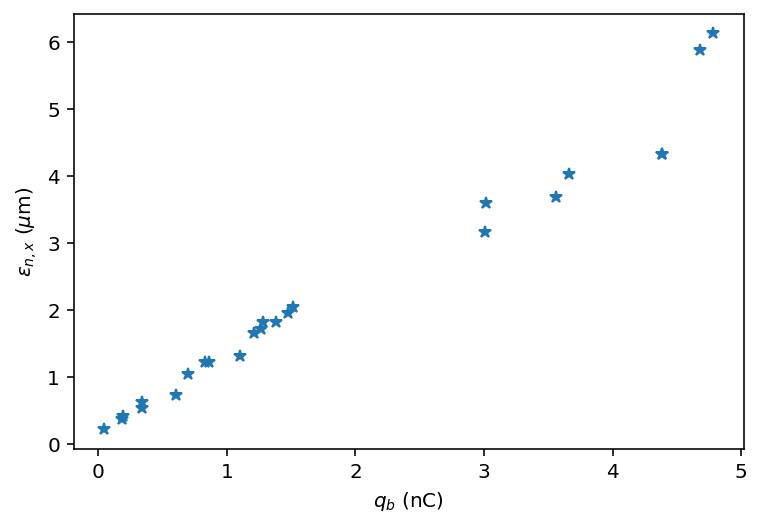

In [146]:
from matplotlib import pyplot as plt
import matplotlib 
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

qs =  np.array([indin['total_charge:value'] for indin in X.population['inputs']])
ens = np.array([indout['end_norm_emitt_x'] for indout in X.population['outputs']])*1e6

plt.plot(qs, ens, '*')
plt.xlabel('$q_b$ (nC)')
plt.ylabel('$\epsilon_{n,x}$ ($\mu$m)');

# Write this configuration

In [10]:
X.save('test.yaml')

Config written as YAML to test.yaml


In [11]:
!cat test.yaml

xopt: {output_path: null, verbose: true, algorithm: cnsga}
algorithm:
  name: cnsga
  options: {max_generations: 16, population_size: 8, crossover_probability: 0.9, mutation_probability: 1.0,
    selection: auto, verbose: true, seed: null}
  max_generations: 16
  population_size: 8
  crossover_probability: 0.9
  mutation_probability: 1.0
  selection: auto
  verbose: true
  seed: null
simulation: {name: gpt_with_distgen, evaluate: gpt.evaluate.evaluate_gpt_with_distgen}
vocs:
  constants: {gun_voltage: 375}
  constraints:
    end_std_t: [LESS_THAN, 0.0015]
  description: Test case
  name: CBETA DC GUN
  objectives: {end_norm_emitt_x: MINIMIZE, end_qbunch: MAXIMIZE}
  simulation: gpt_with_distgen
  templates: {distgen_input_file: /Users/chrisonian/Code/GitHub/xopt/examples/cbeta.dcgun/template/cbeta.dcgun.distgen.in.json,
    gpt_input_file: /Users/chrisonian/Code/GitHub/xopt/examples/cbeta.dcgun/template/cbeta.dcgun.gpt.in}
  variables:
    beam:params:sigma_xy:value: [0, 5]
    beam:pa

# Run with MPI

In [16]:
!mpirun -n 4 python -m mpi4py.futures -m xopt.mpi.run test.yaml

  _   
                | |  
__  _____  _ __ | |_ 
\ \/ / _ \| '_ \| __|
 >  < (_) | |_) | |_ 
/_/\_\___/| .__/ \__|
          | |        
          |_|        

_________________________________
Parallel execution with 4 workers
Loading /Users/chrisonian/Code/GitHub/xopt/examples/xopt_class/test.yaml as YAML 

{'max_generations': 16, 'population_size': 8, 'crossover_probability': 0.9, 'mutation_probability': 1.0, 'selection': 'auto', 'verbose': True, 'seed': None}



 ▄████▄   ███▄    █   ██████   ▄████  ▄▄▄      
▒██▀ ▀█   ██ ▀█   █ ▒██    ▒  ██▒ ▀█▒▒████▄    
▒▓█    ▄ ▓██  ▀█ ██▒░ ▓██▄   ▒██░▄▄▄░▒██  ▀█▄  
▒▓▓▄ ▄██▒▓██▒  ▐▌██▒  ▒   ██▒░▓█  ██▓░██▄▄▄▄██ 
▒ ▓███▀ ░▒██░   ▓██░▒██████▒▒░▒▓███▀▒ ▓█   ▓██▒
░ ░▒ ▒  ░░ ▒░   ▒ ▒ ▒ ▒▓▒ ▒ ░ ░▒   ▒  ▒▒   ▓▒█░
  ░  ▒   ░ ░░   ░ ▒░░ ░▒  ░ ░  ░   ░   ▒   ▒▒ ░
░           ░   ░ ░ ░  ░  ░  ░ ░   ░   ░   ▒   
░ ░               ░       ░        ░       ░  ░
░                                              


Continous Non-dominated Sorting Genetic Algor

# Dask 

In [ ]:
from dask.distributed import Client
executor = Client()
executor

In [ ]:
# Wait a few seconds for the Dask cluster to start
from time import sleep
sleep(5)

In [ ]:
# Increase the number of generations
X.algorithm['options']['max_generations'] = 7
X.run_cnsga(executor)

In [ ]:
X.population

# Cleanup

In [ ]:
!rm -r dask-worker-space

In [ ]:
!rm test.yaml